In [ ]:
That's a scam! do not fall for it 
Ofcourse this is not email, but just another type of spam

- Email Phishing is the most prominent form of phishing.
- The attacker sends a deceptive email that appears to be from a legitimate source.
- The emails often demand sensitive information, such as login credentials, social security numbers, or financial details.
Some Stats:

Aim:
The aim of this project is to develop a robust email spam detection system using machine learning techniques. By analyzing the content and characteristics of emails, the system should be able to accurately classify incoming emails as either spam or legitimate (ham).

We will be exploring below models:
1. LogisticRegression       
2. Super Vector Machine 
3. Random Forest Classifier

The data consist of two columns
1. which is the actual email
2. Label of whether the email is Spam or Ham(not spam)

In [ ]:
Dataset-link :-   https://github.com/hardik0980/Email-spam-Detection-/blob/main/Spam%20mail.csv

# Importing some important Libraries & Load the Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , recall_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter("ignore")

In [7]:
mail_data = pd.read_csv("mail_data - mail_data.csv")

# Exploratory Data Analysis & Data Preprocessing!

In [9]:
mail_data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<!-- replace the null values with string  -->

In [11]:
mail_data.isna().sum()


Category    0
Message     0
dtype: int64

In [12]:
 # replace the null values with a null string

In [13]:
new_mail_data = mail_data.where((pd.notnull(mail_data)),"")

In [14]:
new_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
new_mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
new_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
print("number of duplicate values in the Dataset:",new_mail_data.duplicated().sum())

number of duplicate values in the Dataset: 415


In [18]:
# cheching the number of rows and columns in the dataframe
print(" number of rows and columns in Dataset:",new_mail_data.shape)

 number of rows and columns in Dataset: (5572, 2)


# Spam mail as 1; Ham mail as 0; :  Using by LabelEncoder

In [20]:

lb = LabelEncoder()
lb.fit(new_mail_data["Category"])
new_mail_data["Category"]=lb.transform(new_mail_data["Category"])
print(new_mail_data.Category)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32


In [21]:
new_mail_data.Category.value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [22]:
print("percentage of Ham is :",100*4825/new_mail_data["Category"].count().sum())
print("percentage of Spam is :",100* 747/new_mail_data["Category"].count().sum())

percentage of Ham is : 86.59368269921033
percentage of Spam is : 13.406317300789663


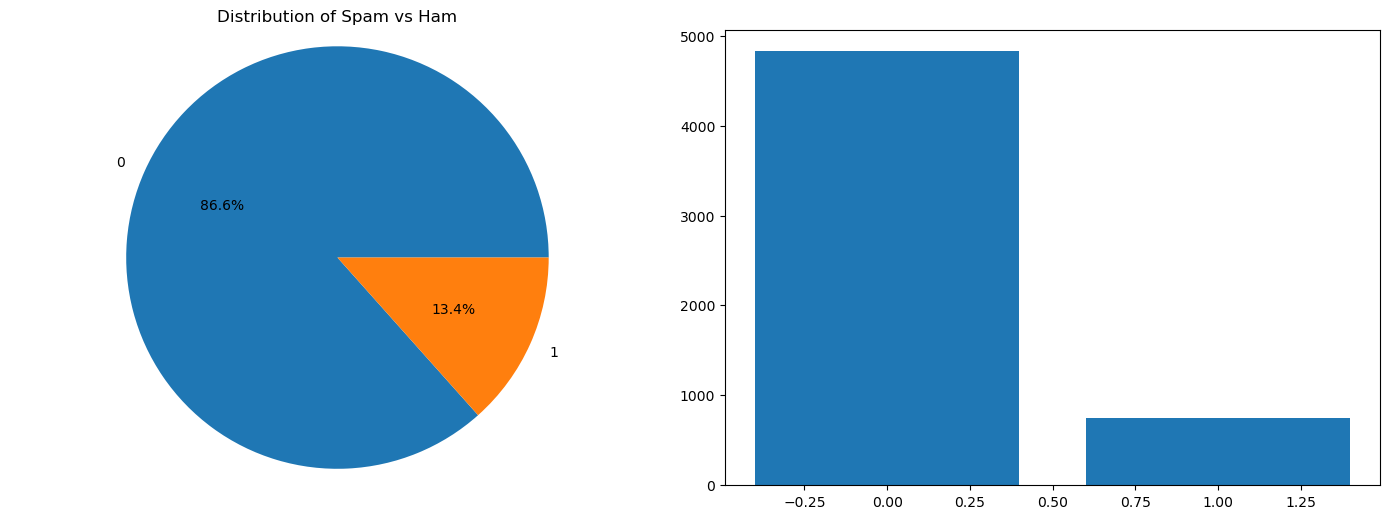

In [23]:
# Calculate the count of each label

category_counts = new_mail_data.Category.value_counts()

# Plotting the pie chart

plt.figure(figsize=(14,10)) 

plt.subplot(2,2,1)
plt.pie(category_counts, labels=category_counts.index , autopct="%1.1f%%") #autopct='%1.1f%%': Formats the percentage display with one decimal place.
plt.title("Distribution of Spam vs Ham")
plt.axis("equal") ## Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplot(2,2,2)
plt.bar(category_counts.index ,category_counts )
plt.tight_layout()
plt.show()

In [24]:
x = new_mail_data.Message   # independent 

y = new_mail_data.Category  # dependent 

In [25]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [26]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32


In [27]:
# splitting the data into training data & test data

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=3)

In [28]:
print("\nTotal shape of x is :",x.shape,"\nshape of X_train is :",x_train.shape,"\nshape of x_test is :",x_test.shape)


Total shape of x is : (5572,) 
shape of X_train is : (4457,) 
shape of x_test is : (1115,)


# feature Extraction



In [30]:
# trainsfrom the text data to feature vectors that can be used as input to the Logistic Regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words="english" , lowercase=True, token_pattern='(?u)\\b\\w\\w+\\b' ) 

x_train_feature =feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

# convert y_train and y_test values as integers

y_train= y_train.astype("int")
y_test = y_test.astype("int")

In [31]:
print(x_train_feature)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [32]:
print(x_test_feature)

  (0, 7271)	0.1940327008179069
  (0, 6920)	0.20571591693537986
  (0, 5373)	0.2365698724638063
  (0, 5213)	0.1988547357502182
  (0, 4386)	0.18353336340308998
  (0, 1549)	0.2646498848307188
  (0, 1405)	0.3176863938914351
  (0, 1361)	0.25132445289897426
  (0, 1082)	0.2451068436245027
  (0, 1041)	0.28016206931555726
  (0, 405)	0.2381316303003606
  (0, 306)	0.23975986557206702
  (0, 20)	0.30668032384591537
  (0, 14)	0.26797874471323896
  (0, 9)	0.2852706805264544
  (0, 1)	0.2381316303003606
  (1, 7368)	0.29957800964520975
  (1, 6732)	0.42473488678029325
  (1, 6588)	0.3298937975962767
  (1, 6507)	0.26731535902873493
  (1, 6214)	0.3621564482127515
  (1, 4729)	0.22965776503163893
  (1, 4418)	0.3457696891316818
  (1, 3491)	0.496093956101028
  (2, 7205)	0.22341717215670331
  :	:
  (1110, 3167)	0.5718357066163949
  (1111, 7353)	0.4991205841293424
  (1111, 6787)	0.40050175714278885
  (1111, 6033)	0.4714849709283488
  (1111, 3227)	0.44384935772735523
  (1111, 2440)	0.4137350055985486
  (1112, 7071)

# Training and testing model with LogisticRegression

In [34]:
Logistic_model = LogisticRegression()
Logistic_model.fit(x_train_feature,y_train)


LogisticRegression()

Logistic_accuracy_on_training_data is : 0.9676912721561588
Logistic_accuracy_on_testing_data is : 0.9668161434977578

classification_report of LogisticRegression
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       960
           1       1.00      0.76      0.86       155

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


 Confusion Metrix of LogisticRegression 
 [[960   0]
 [ 37 118]]


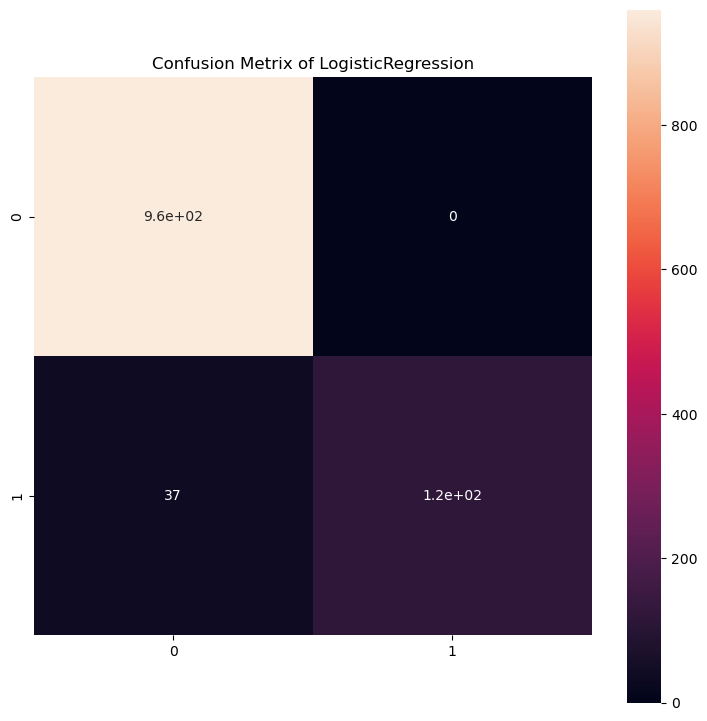

In [35]:
# prediction on training data

prediction_on_training_data = Logistic_model.predict(x_train_feature)
accuracy_on_training_data = accuracy_score(y_train , prediction_on_training_data)
print("Logistic_accuracy_on_training_data is :",accuracy_on_training_data)

# prediction on testing data

prediction_on_testing_data = Logistic_model.predict(x_test_feature)
accuracy_on_testing_data = accuracy_score(y_test , prediction_on_testing_data)
print("Logistic_accuracy_on_testing_data is :",accuracy_on_testing_data)

print("\nclassification_report of LogisticRegression\n",classification_report(y_test , prediction_on_testing_data))



print("\n Confusion Metrix of LogisticRegression \n",confusion_matrix(y_test , prediction_on_testing_data))
conf_mat = confusion_matrix(y_test , prediction_on_testing_data)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat , annot=True , square=True)
plt.title("Confusion Metrix of LogisticRegression")
plt.show()


# Training and testing model with Support Vector Machines

In [37]:
# Support Vector Machines (SVM) with tuned parameters
from sklearn.svm import SVC

svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(x_train_feature, y_train)

SVC(C=10.0, gamma='auto')

svm_accuracy_on_training_data is : 0.8671752299753197
svm_accuracy_on_testing_data is : 0.8609865470852018

classification_report of SVM
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       960
           1       0.00      0.00      0.00       155

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.74      0.86      0.80      1115


 Confusion Metrix of SVM 
 [[960   0]
 [155   0]]


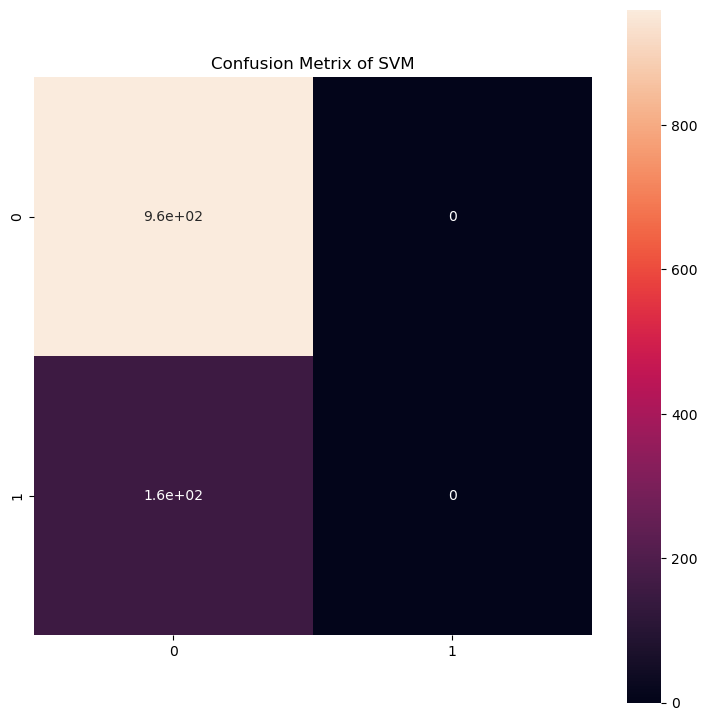

In [38]:
prediction_on_training_data = svm_model.predict(x_train_feature)
accuracy_on_training_data = accuracy_score(y_train , prediction_on_training_data)
print("svm_accuracy_on_training_data is :",accuracy_on_training_data)

prediction_on_testing_data = svm_model.predict(x_test_feature)
accuracy_on_testing_data = accuracy_score(y_test , prediction_on_testing_data)
print("svm_accuracy_on_testing_data is :",accuracy_on_testing_data)

print("\nclassification_report of SVM\n",classification_report(y_test , prediction_on_testing_data))


print("\n Confusion Metrix of SVM \n",confusion_matrix(y_test , prediction_on_testing_data))
conf_mat = confusion_matrix(y_test , prediction_on_testing_data)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat , annot=True , square=True)
plt.title("Confusion Metrix of SVM")
plt.show()


# Training and testing model with Random Forest classifier

In [40]:
# Random Forests with tuned parameters
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(x_train_feature, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10)

RF_accuracy_on_training_data is : 0.9382993044648867
RF_accuracy_on_testing_data is : 0.9291479820627803

classification_report RandomForest
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       960
           1       1.00      0.49      0.66       155

    accuracy                           0.93      1115
   macro avg       0.96      0.75      0.81      1115
weighted avg       0.93      0.93      0.92      1115


 Confusion Metrix of RandomForest 
 [[960   0]
 [ 79  76]]


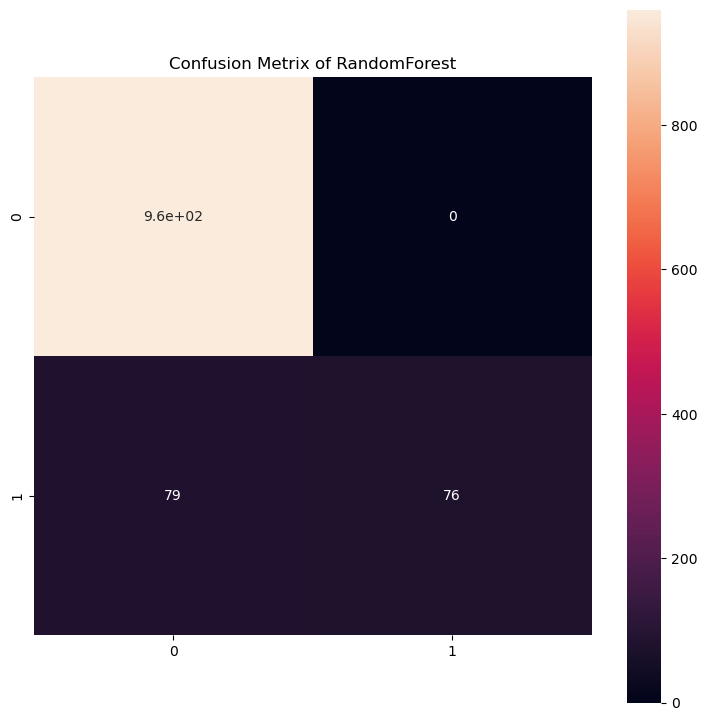

In [41]:
prediction_on_training_data = rf_model.predict(x_train_feature)
accuracy_on_training_data = accuracy_score(y_train , prediction_on_training_data)
print("RF_accuracy_on_training_data is :",accuracy_on_training_data)

prediction_on_testing_data = rf_model.predict(x_test_feature)
accuracy_on_testing_data = accuracy_score(y_test , prediction_on_testing_data)
print("RF_accuracy_on_testing_data is :",accuracy_on_testing_data)

print("\nclassification_report RandomForest\n",classification_report(y_test , prediction_on_testing_data))



print("\n Confusion Metrix of RandomForest \n",confusion_matrix(y_test , prediction_on_testing_data))
conf_mat = confusion_matrix(y_test , prediction_on_testing_data)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat , annot=True , square=True)
plt.title("Confusion Metrix of RandomForest")
plt.show()

# Accuracy of the Logistic Regression model on Testing data is  0.96681

# Accuracy of the Super vector machine model on testing data is 0.8609

# Accuracy of the random Forest Classifier model on testing data is 0.9228

# Demo of Email

# Building Prediction system

In [48]:
input_mail =["Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"]

input_data_features = feature_extraction.transform(input_mail)

# making prediction

Logistic_Regression_predictions = Logistic_model.predict(input_data_features)

SVM_predictions = svm_model.predict(input_data_features)

Random_Forest_predictions = rf_model.predict(input_data_features)

# Print predictions for each model
print("Logistic Regression Prediction:", Logistic_Regression_predictions[0])
print("SVM Prediction:", SVM_predictions[0])
print("Random Forest Prediction:", Random_Forest_predictions[0])

# Decide on a final prediction (e.g., majority vote or based on one model)
# Example: Using Random Forest prediction as the final output
final_prediction = Random_Forest_predictions[0]

if final_prediction == 1:
    print("Spam mail")
else:
    print("Ham mail")


Logistic Regression Prediction: 1
SVM Prediction: 0
Random Forest Prediction: 0
Ham mail
